In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import mpl_toolkits
%matplotlib inline

In [2]:
# Load your dataset
df_train = pd.read_csv('train.csv')

In [3]:
df_train.isnull().sum().sum()

7829

In [4]:
# Display information about the missing values before handling them
print("Missing values in train dataset before handling:")
print(df_train.isnull().sum())

# Handle missing values for numerical features (fill with mean)
numerical_features = df_train.select_dtypes(include=['float64', 'int64']).columns
df_train[numerical_features] = df_train[numerical_features].fillna(df_train[numerical_features].mean())

# Handle missing values for categorical features (fill with mode)
categorical_features = df_train.select_dtypes(include=['object']).columns
df_train[categorical_features] = df_train[categorical_features].fillna(df_train[categorical_features].mode().iloc[0])

# Display information about the missing values after handling
print("\nMissing values in train dataset after handling:")
print(df_train.isnull().sum())

Missing values in train dataset before handling:
Id                 0
MSSubClass         0
MSZoning           0
LotFrontage      259
LotArea            0
                ... 
MoSold             0
YrSold             0
SaleType           0
SaleCondition      0
SalePrice          0
Length: 81, dtype: int64

Missing values in train dataset after handling:
Id               0
MSSubClass       0
MSZoning         0
LotFrontage      0
LotArea          0
                ..
MoSold           0
YrSold           0
SaleType         0
SaleCondition    0
SalePrice        0
Length: 81, dtype: int64


In [5]:

# Display information about the dataset before handling outliers
print("Dataset before handling outliers:")
print(df_train.head())

# Identify numerical columns
numerical_columns = df_train.select_dtypes(include=['float64', 'int64']).columns

# Define a multiplier for the IQR (you can adjust this based on your data)
iqr_multiplier = 1.5

# Handle outliers using IQR method
for col in numerical_columns:
    # Calculate Q1 and Q3
    q1 = df_train[col].quantile(0.25)
    q3 = df_train[col].quantile(0.75)

    # Calculate IQR
    iqr = q3 - q1

    # Define upper and lower bounds
    lower_bound = q1 - iqr_multiplier * iqr
    upper_bound = q3 + iqr_multiplier * iqr

    # Replace outliers with the nearest non-outlier value
    df_train[col] = df_train[col].apply(lambda x: lower_bound if x < lower_bound else (upper_bound if x > upper_bound else x))

# Display information about the dataset after handling outliers
print("\nDataset after handling outliers:")
print(df_train.head())


Dataset before handling outliers:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1          60       RL         65.0     8450   Pave  Grvl      Reg   
1   2          20       RL         80.0     9600   Pave  Grvl      Reg   
2   3          60       RL         68.0    11250   Pave  Grvl      IR1   
3   4          70       RL         60.0     9550   Pave  Grvl      IR1   
4   5          60       RL         84.0    14260   Pave  Grvl      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
1         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
2         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
3         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   
4         Lvl    AllPub  ...        0     Gd  MnPrv        Shed       0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008 

In [6]:
from sklearn.preprocessing import LabelEncoder

# Function to label encode categorical columns
# def label_encode(df, categorical_columns):
#     le = LabelEncoder()
#     for col in categorical_columns:
#         if col in df.columns and df[col].dtype == 'object':
#             df[col] = le.fit_transform(df[col].astype(str))
#     return df

# Function to one-hot encode categorical columns
def one_hot_encode(df, categorical_columns):
    df = pd.get_dummies(df, columns=categorical_columns, drop_first=True)
    return df

# Display information about the dataset before encoding
print("Dataset before encoding:")
print(df_train.head())

# Identify categorical columns
categorical_columns = df_train.select_dtypes(include=['object']).columns

# Label encode categorical columns
#df_train = label_encode(df_train, categorical_columns)

# One-hot encode categorical columns
df_train = one_hot_encode(df_train, categorical_columns)

# Display information about the dataset after encoding
print("\nDataset after encoding:")
print(df_train.head())

Dataset before encoding:
   Id  MSSubClass MSZoning  LotFrontage  LotArea Street Alley LotShape  \
0   1        60.0       RL         65.0   8450.0   Pave  Grvl      Reg   
1   2        20.0       RL         80.0   9600.0   Pave  Grvl      Reg   
2   3        60.0       RL         68.0  11250.0   Pave  Grvl      IR1   
3   4        70.0       RL         60.0   9550.0   Pave  Grvl      IR1   
4   5        60.0       RL         84.0  14260.0   Pave  Grvl      IR1   

  LandContour Utilities  ... PoolArea PoolQC  Fence MiscFeature MiscVal  \
0         Lvl    AllPub  ...      0.0     Gd  MnPrv        Shed     0.0   
1         Lvl    AllPub  ...      0.0     Gd  MnPrv        Shed     0.0   
2         Lvl    AllPub  ...      0.0     Gd  MnPrv        Shed     0.0   
3         Lvl    AllPub  ...      0.0     Gd  MnPrv        Shed     0.0   
4         Lvl    AllPub  ...      0.0     Gd  MnPrv        Shed     0.0   

  MoSold YrSold  SaleType  SaleCondition  SalePrice  
0      2   2008        WD

In [7]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder

def drop_low_correlation_columns(df_train, target_column, threshold=0.2):

    #Calculate correlation with the target variable
    correlation = df_train.corr()[target_column].abs()

    #Set a correlation threshold
    low_correlation_columns = correlation[correlation < threshold].index

    #Drop columns with low correlation
    df_train.drop(low_correlation_columns, axis=1, inplace=True)

    return df_train

 #Drop low-correlation columns automatically
df_train = drop_low_correlation_columns(df_train,"SalePrice")

In [8]:
#standarzation
from sklearn.preprocessing import StandardScaler
X = df_train.drop('SalePrice', axis=1)
y = df_train['SalePrice']
# Display information about the dataset before standardization
#print("Dataset before standardization:")
#print(df_train.head())

# Feature scaling
scaler = StandardScaler()
X = scaler.fit_transform(X)



In [9]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 70 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   LotFrontage            1460 non-null   float64
 1   LotArea                1460 non-null   float64
 2   OverallQual            1460 non-null   float64
 3   YearBuilt              1460 non-null   float64
 4   YearRemodAdd           1460 non-null   int64  
 5   MasVnrArea             1460 non-null   float64
 6   BsmtFinSF1             1460 non-null   float64
 7   BsmtFinSF2             1460 non-null   float64
 8   BsmtUnfSF              1460 non-null   float64
 9   TotalBsmtSF            1460 non-null   float64
 10  1stFlrSF               1460 non-null   float64
 11  2ndFlrSF               1460 non-null   float64
 12  LowQualFinSF           1460 non-null   float64
 13  GrLivArea              1460 non-null   float64
 14  BsmtFullBath           1460 non-null   float64
 15  Bsmt

In [10]:
from sklearn.model_selection import train_test_split
# Identify features (X) and target variable (y)
# Replace 'target_column' with the actual name of your target variable


# Split the dataset into training and testing sets
# Adjust the test_size parameter to set the proportion of the dataset for testing
# Set random_state for reproducibility
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Display the shape of the training and testing sets
print("Training set shape:", X_train.shape, y_train.shape)
print("Testing set shape:", X_test.shape, y_test.shape)


Training set shape: (1168, 69) (1168,)
Testing set shape: (292, 69) (292,)


In [11]:

from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error, r2_score
import numpy as np
from sklearn.linear_model import LinearRegression
#regressor = LinearRegression()
regressor = KNeighborsRegressor(n_neighbors=5)

# Train the model on the training set
regressor.fit(X_train, y_train)

# Make predictions on the testing set
y_pred = regressor.predict(X_test)

# Evaluate the performance of the model
#mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

#print("Mean Squared Error:", mse)
print("R^2 Score:", r2)

R^2 Score: 0.8682312636764595


In [12]:

from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsRegressor  # Replace with your chosen regressor
from sklearn.metrics import mean_squared_error



# Perform cross-validation with different scoring types
mse_scores = cross_val_score(regressor, X, y, cv=5, scoring='neg_mean_squared_error')
r2_scores = cross_val_score(regressor, X, y, cv=5, scoring='r2')
mae_scores = cross_val_score(regressor, X, y, cv=5, scoring='neg_mean_absolute_error')


# Display the results
# print("Mean Squared Error Scores:", -mse_scores.mean())
# print("R2 Scores:", r2_scores.mean())
# print("Mean Absolute Error Scores:", -mae_scores.mean())


#Obtain cross-validated accuracy scores
accuracy_scores = cross_val_score(regressor, X, y, cv=5, scoring='r2')

#Print the cross-validated accuracy scores
print("Cross-validated accuracy scores:", accuracy_scores)

Cross-validated accuracy scores: [0.83306424 0.82115765 0.80416696 0.85326402 0.79968945]


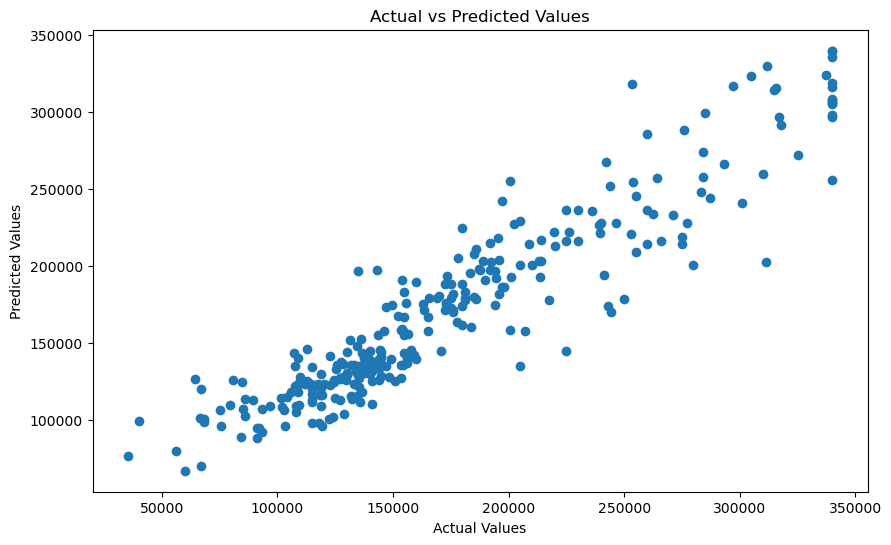

In [13]:

plt.figure(figsize=(10, 6))
plt.scatter(y_test, y_pred)
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values')
plt.ylabel('Predicted Values')
plt.show()

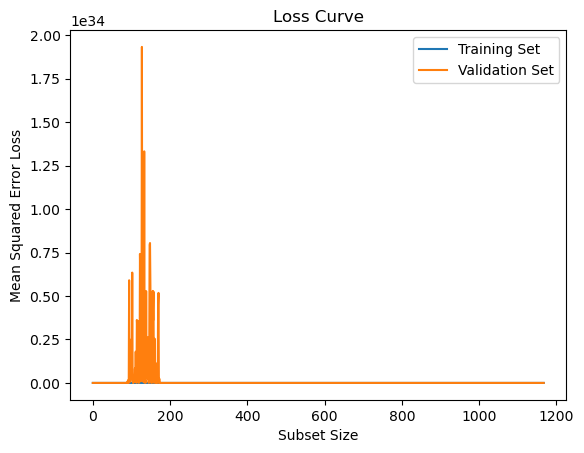

In [14]:
# Split the data into training and validation sets
from sklearn.linear_model import LinearRegression
split_ratio = 0.8
split_index = int(split_ratio * len(X))

X_train, X_val = X[:split_index], X[split_index:]
y_train, y_val = y[:split_index], y[split_index:]

# Create a linear regression model
model = LinearRegression()

# Train the model on different subsets and collect mean squared error
mse_values_train = []
mse_values_val = []

for i in range(1, split_index + 1):
    model.fit(X_train[:i], y_train[:i])

    # Calculate mean squared error for training set
    y_train_preds = model.predict(X_train[:i])
    mse_train = mean_squared_error(y_train[:i], y_train_preds)
    mse_values_train.append(mse_train)

    # Calculate mean squared error for validation set
    y_val_preds = model.predict(X_val)
    mse_val = mean_squared_error(y_val, y_val_preds)
    mse_values_val.append(mse_val)

# Plot the loss curves
plt.plot(mse_values_train, label='Training Set')
plt.plot(mse_values_val, label='Validation Set')
plt.title('Loss Curve')
plt.xlabel('Subset Size')
plt.ylabel('Mean Squared Error Loss')
plt.legend()
plt.show()